<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/Regression/Regression_%7C_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
In tasks, use a linear regression model from the sklearn library:

from sklearn.linear_model import LinearRegression

Train the model with default settings (with default arguments when creating an object of the LinearRegression class): LinearRegression().fit(X, y)

[Full description of the linear regression model from the sklearn library.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

If you think that you wrote the correct code, but the answers are not accepted by the verification system, send a link to your notebook in Google Colab with editing rights or *.ipynb file to our mail dc@itmo.ru. Don't forget to introduce yourself and enter your openedu username.

## Task 1

You have the observation results of time that a person spent in a line in relation to the number of people in the line.

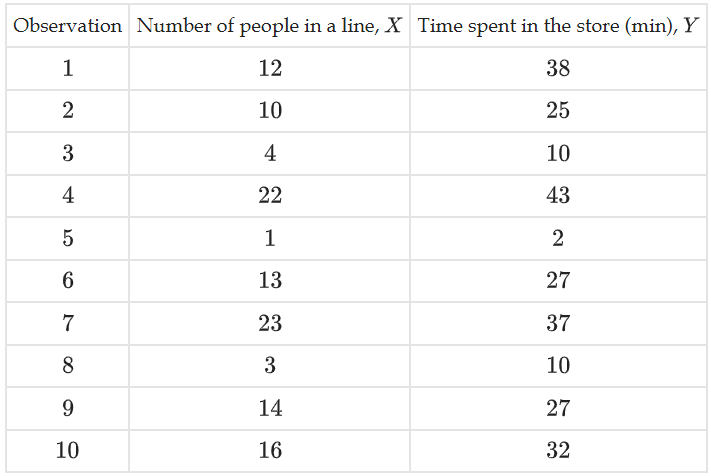

Below, the table data is presented in a row format:

id,X,Y

1,12,38

2,10,25

3,4,10

4,22,43

5,1,2

6,13,27

7,23,37

8,3,10

9,14,27

10,16,32

Train the linear regression model to predict the values and enter the specified parameters.

> Find the sample mean $\bar{X}$:

> Find the sample mean $\bar{Y}$:

> Calculate the coefficient $\theta_0$

> Calculate the coefficient $\theta_1$

> Estimate the model accuracy by calculating R-squared statistics, $R^2$:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
X = np.array([12, 10, 4, 22, 1, 13, 23, 3, 14, 16])
Y = np.array([38, 25, 10, 43, 2, 27, 37, 10, 27, 32])

In [ ]:
x = np.mean(X)
y = np.mean(Y)
print(f'the sample mean X: {x}')
print(f'the sample mean Y: {y}')

the sample mean X: 11.8
the sample mean Y: 25.1


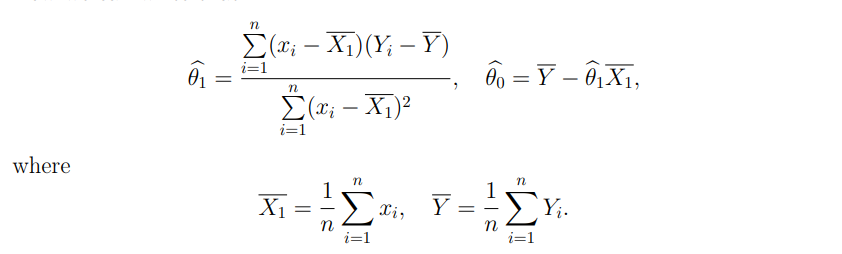


In [ ]:
theta1 = sum([(X[i]-x)*(Y[i]-y) for i in range(len(X))])/sum([(X[i]-x)**2 for i in range(len(X))])
theta0 = y - theta1*x

print(f'theta1: {round(theta1,2)}, theta0: {round(theta0,2)}')

theta1: 1.67, theta0: 5.4


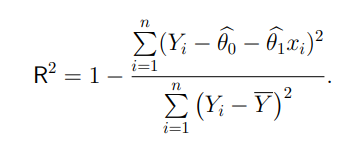

In [ ]:
R2 = 1 - sum([(Y[i]-theta0-theta1*X[i])**2 for i in range(len(X))]) / sum([(Y[i]-y)**2 for i in range(len(Y))])
print(f'R**2: {round(R2, 2)}')

R**2: 0.85


## Task2

[The provided dataset](https://drive.google.com/file/d/1pKxrteRNJQhQDU3hcsCsyy1cIQTf0rU-/view?usp=drive_link) consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

**IMPORTANT:** Tasks with detailed explanations are presented in the notebook. When completing tasks in the notebook, you should enter your answers in the appropriate input boxes below. It is recommended that you enter the answers step by step, with a sufficient number of attempts provided for this purpose.

Use `train_test_split()` to split the dataset into training and test samples with parameters `test_size=0.2, random_state=21`. Use stratification by column Species. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

> Find sample mean for the column Width of the obtained training sample.
> 1. Building a base model
Remove categorical features and train a linear regression model on the training dataset. Perform predictions on the test dataset.
Evaluate the model using the metric `r2_score()`.

* Enter `r2_score()` of the obtained model.

> 2. Adding feature preprocessing

**Use of PCA**

* List, separated by comma and space, the top three most correlated features that are dropped.
* Train a PCA model for the three most correlated features. Enter the explained variance ratio when using only the first principal component.
* Replace the top three most correlated features with the obtained feature whose values coincide with the scores for the first principal component. Train the linear regression model. Enter `r2_score()` of the obtained model.

**Feature engineering**

* Using the dataset obtained at the previous step, cube the values of the features Width, Height, Lengths. Enter the sample mean for the column Width of the training dataset after cubeization.

Images corresponding to the dependence of Weight on Width before the transformation and after.

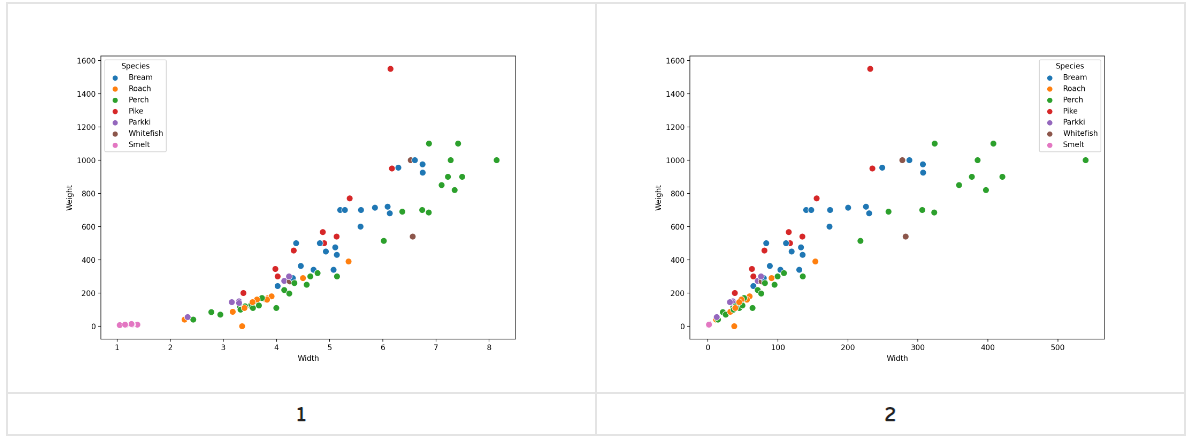

* Enter the image number corresponding to the dependence of Weight on Width after transformation. (Enter the number 1 or 2.)

* Train the linear regression model. Enter `r2_score()` of the obtained model

**Adding categorical features**

* Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using `pd.get_dummies()`. Train the linear regression model. Enter `r2_score()` of the obtained model.

* Encode categorical features using `pd.get_dummies(drop_first=True)`. Enter `r2_score()` of the model obtained after eliminating a feature correlation.



In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
data = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/fish_train.csv', encoding = 'utf-8', delimiter=',')

In [150]:
train, test = train_test_split(data, test_size=0.2, random_state=21, stratify=data['Species'])

In [151]:
round(np.mean(train['Width']), 3)

4.485

**1. Building a base model**

Removing categorical features and training a linear regression model on a training dataset. Making a prediction for a test dataset.

In [152]:
species_train = train['Species']
y_train = train[['Weight']]
train.drop(axis=1, columns=['Species', 'Weight'], inplace=True)

In [153]:
reg = LinearRegression().fit(train, y_train)

In [154]:
species_test = test['Species']
y_test = test[['Weight']]
test.drop(axis=1, columns=['Species', 'Weight'], inplace=True)

In [155]:
y_pred = reg.predict(test)
round(r2_score(y_test, y_pred), 3)

0.893

**2. Adding feature preprocessing**

List, separated by comma and space, the top three most correlated features that are dropped.

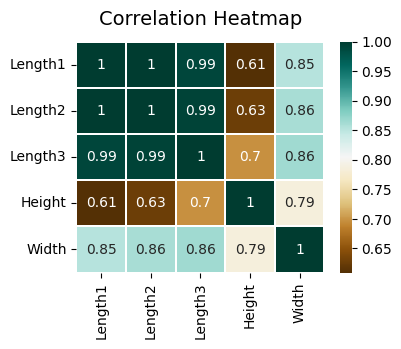

In [156]:
heatmap = plt.figure(figsize=(4, 3))

heatmap = sns.heatmap(train.corr(), annot=True, cmap="BrBG", linewidths=0.1)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

It can be seen from the correlation matrix that the three most correlated features are 'Length1' & 'Length2' & 'Length3'

In [157]:
corr_features = train[['Length1', 'Length2','Length3']]
corr_features.head()

,Length1,Length2,Length3
83,31.8,35.0,40.6
92,31.9,35.0,40.5
2,26.5,29.0,34.0
43,21.1,22.5,25.0
10,19.0,21.0,22.5


Use the principal component analysis to reduce the number of uninformative dimensions. Replace the top three most correlated features with the new feature Lengths whose values coincide with the scores for the first principal component.

In [158]:
pca = PCA(n_components=3, svd_solver='full').fit(corr_features)
df_train = pca.transform(corr_features)
df1 = pd.DataFrame(df_train, columns=['PC1', 'PC2', 'PC3'])
df1.head()

,PC1,PC2,PC3
0,12.057750,2.113982,-0.119247
1,12.049517,1.983936,-0.064290
2,1.687267,1.844787,0.055709
3,-10.507924,-0.064370,0.261721
4,-14.041230,-0.387761,-0.304993


In [159]:
pca1 = PCA(n_components=3, svd_solver='full').fit(corr_features)
print(f'The explained variance ratio when using only the first principal component: {round(pca1.explained_variance_ratio_[0], 3)}')

The explained variance ratio when using only the first principal component: 0.996


In [160]:
len(df1), len(train)

(95, 95)

In [161]:
train.drop(axis=1, columns=['Length1', 'Length2','Length3'], inplace=True)
train['Len'] = df1['PC1'].tolist()
train.head()

,Height,Width,Len
83,15.4686,6.1306,12.057750
92,16.2405,5.5890,12.049517
2,12.4440,5.1340,1.687267
43,6.4000,3.8000,-10.507924
10,5.9175,3.3075,-14.041230


In [162]:
corr_features = test[['Length1', 'Length2','Length3']]
df_test = pca.transform(corr_features)
df2 = pd.DataFrame(df_test, columns=['PC1', 'PC2', 'PC3'])
df2.head()

,PC1,PC2,PC3
0,13.262863,-0.145547,-0.008646
1,-11.101741,-0.547376,-0.242349
2,5.096576,1.917286,0.374073
3,-22.875429,0.021650,0.068264
4,17.948894,1.942156,-0.189213


In [163]:
test.drop(axis=1, columns=['Length1', 'Length2','Length3'], inplace=True)
test['Len'] = df2['PC1'].tolist()
test.head()

,Height,Width,Len
31,11.7612,6.5736,13.262863
42,5.9532,3.6300,-11.101741
54,14.2266,4.9594,5.096576
95,6.5772,2.3142,-22.875429
11,18.0369,6.3063,17.948894


Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions on the test dataset and evaluate the model using `r2_score()`.

In [164]:
reg1 = LinearRegression().fit(train, y_train)

In [165]:
y_pred1 = reg1.predict(test)
round(r2_score(y_test, y_pred1), 3)

0.899

It can be seen that the quality of the model has not changed significantly.

**3. Feature engineering**

Plot the dependencies of the features on the target feature, e.g., by using `sns.pairplot()`.

It can be seen that the mass, in general, does not depend linearly on the other features. So, in order for the linear model to do a proper predictions, it makes sense to transform the features so that the dependence becomes more similar to a linear one. But how to come up with such a dependence?

It is logical to assume that the mass of a fish should somehow smoothly depend on the other parameters responsible in one way or another for its size. If we remember that mass is the product of density by volume, then

$m=ρ⋅V$.

Suppose that the average density of all fish is the same, and recall that in homothety the volume of the object depends on the linear dimensions as a cube, then we obtain

$m∼V∼d3$

Take to the third degree all the features of training and test datasets that are responsible in one way or another for the fish size (Height, Width, Lengths), and check whether the dependence of mass on these features has become linear.

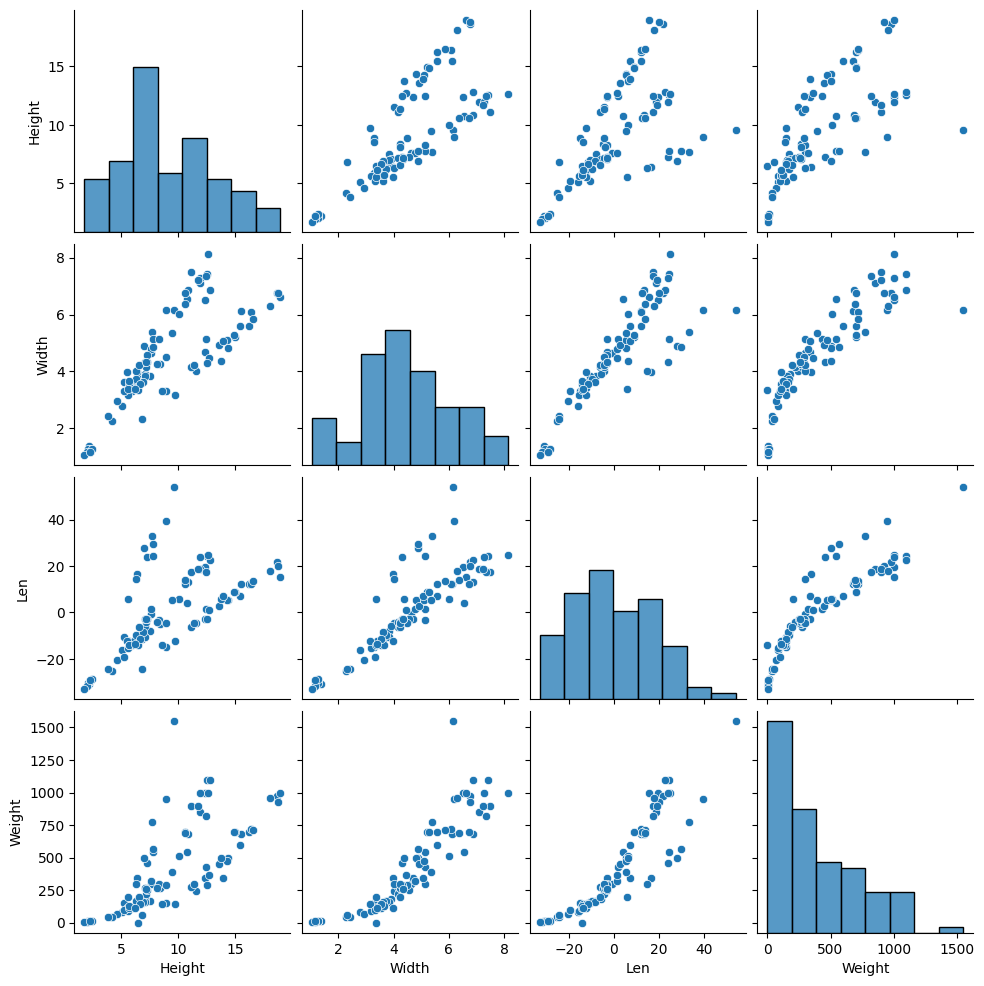

In [166]:
train_plot = train.copy(deep=True)
train_plot['Weight'] = y_train['Weight'].tolist()
sns.pairplot(train_plot);

In [167]:
train_cube = train.copy(deep=True)
train_cube['Width'] = train['Width'] * train['Width'] * train['Width']
train_cube['Height'] = train['Height'] * train['Height'] * train['Height']
train_cube['Len'] = train['Len'] * train['Len'] * train['Len']
train_cube.head()

,Height,Width,Len
83,3701.289266,230.414042,1753.068301
92,4283.494243,174.583151,1749.479901
2,1926.992424,135.321746,4.803428
43,262.144000,54.872000,-1160.247840
10,207.211951,36.182582,-2768.314918


In [168]:
round(train['Width'].mean(), 3)

4.485

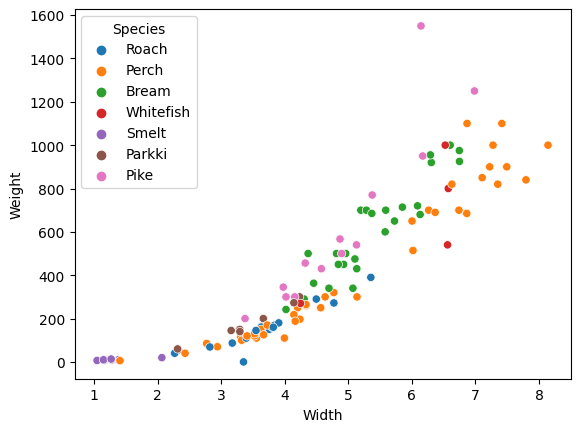

In [169]:
sns.scatterplot(data=data, x='Width', y='Weight', hue='Species');

In [170]:
test_cube = test.copy(deep=True)
test_cube['Width'] = test['Width'] * test['Width'] * test['Width']
test_cube['Height'] = test['Height'] * test['Height'] * test['Height']
test_cube['Len'] = test['Len'] * test['Len'] * test['Len']

In [172]:
#train_cube.drop(axis=1, columns=['Weight'], inplace=True)
reg2 = LinearRegression().fit(train_cube, y_train)

In [173]:
y_pred2 = reg2.predict(test_cube)
round(r2_score(y_test, y_pred2), 3)

0.94

**4. Adding categorical features**

Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using `pd.get_dummies()`. Train the linear regression model. Enter `r2_score()` of the obtained model.

In [174]:
train1 = train_cube.copy(deep=True)
train1['Species'] = species_train

In [ ]:
train1 = pd.get_dummies(train1, columns=['Species'])

In [181]:
test1 = test_cube.copy(deep=True)
test1['Species'] = species_test
test1 = pd.get_dummies(test1, columns=['Species'])

In [179]:
reg3 = LinearRegression().fit(train1, y_train)

In [183]:
y_pred3 = reg3.predict(test1)
round(r2_score(y_test, y_pred3), 3)

0.943

It can be seen that after one-hot encoding the features became correlated. You can get rid of this, for example, by using the `drop_first=True` parameter. Re-train the model after correcting this flaw. Perform predictions for the test dataset, evaluate the model using `r2_score()`.


In [ ]:
train2 = train_cube.copy(deep=True)
train2['Species'] = species_train

train2 = pd.get_dummies(train2, columns=['Species'], drop_first=True)

In [186]:
test2 = test_cube.copy(deep=True)
test2['Species'] = species_test
test2 = pd.get_dummies(test2, columns=['Species'], drop_first=True)

In [187]:
reg4 = LinearRegression().fit(train2, y_train)

In [188]:
y_pred4 = reg4.predict(test2)
round(r2_score(y_test, y_pred4), 3)

0.943

On such a relatively small dataset, though, we see no difference.